In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import matplotlib
matplotlib.style.use('seaborn')
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 5
from plotly.graph_objs import *
from plotly.offline import init_notebook_mode, iplot, iplot_mpl
init_notebook_mode()
from tqdm import tqdm
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("../dataset/excel_fpt.csv")
df.columns = ["Ticker", "Time", "Open","High","Low","Close","Volume"]

In [5]:
df.shape

(3490, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3490 entries, 0 to 3489
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ticker  3490 non-null   object 
 1   Time    3490 non-null   int64  
 2   Open    3490 non-null   float64
 3   High    3490 non-null   float64
 4   Low     3490 non-null   float64
 5   Close   3490 non-null   float64
 6   Volume  3490 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 191.0+ KB


In [7]:
df.drop(["Ticker"], axis=1,inplace=True)

In [8]:
df.Time = pd.to_datetime(df.Time, format="%Y%m%d",errors='coerce')

In [9]:
df['dayofweek'] = df['Time'].dt.dayofweek
df['quarter'] = df['Time'].dt.quarter
df['month'] = df['Time'].dt.month
df['year'] = df['Time'].dt.year
df['dayofyear'] = df['Time'].dt.dayofyear
df['dayofmonth'] = df['Time'].dt.day
df['weekofyear'] = df['Time'].dt.weekofyear

In [10]:
df.head()

Time  Open  High   Low  Close   Volume  dayofweek  quarter  month  \
0 2020-12-16  57.2  57.5  57.0   57.1  1995530          2        4     12   
1 2020-12-15  57.5  57.6  56.6   56.7  2666900          1        4     12   
2 2020-12-14  57.0  58.0  56.9   57.2  1443760          0        4     12   
3 2020-12-11  56.6  57.0  56.3   57.0  1750270          4        4     12   
4 2020-12-10  57.0  57.7  56.5   56.5  2112490          3        4     12   

   year  dayofyear  dayofmonth  weekofyear  
0  2020        351          16          51  
1  2020        350          15          51  
2  2020        349          14          51  
3  2020        346          11          50  
4  2020        345          10          50

In [11]:
df = df.sort_values(by=["Time"], ascending=True, ignore_index=True)
df = df.set_index("Time")

In [12]:
df.index

DatetimeIndex(['2006-12-13', '2006-12-14', '2006-12-15', '2006-12-18',
               '2006-12-19', '2006-12-20', '2006-12-21', '2006-12-22',
               '2006-12-25', '2006-12-26',
               ...
               '2020-12-03', '2020-12-04', '2020-12-07', '2020-12-08',
               '2020-12-09', '2020-12-10', '2020-12-11', '2020-12-14',
               '2020-12-15', '2020-12-16'],
              dtype='datetime64[ns]', name='Time', length=3490, freq=None)

# A. Phân tích khai phá dữ liệu (EDA)

## 1. Time plot + Box Plot

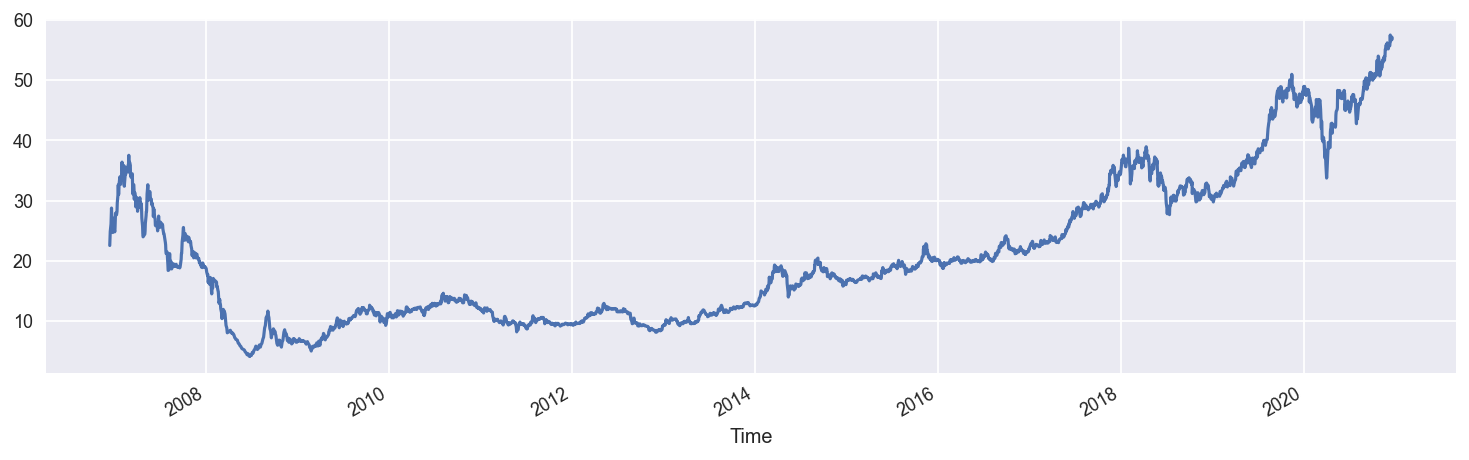

In [13]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(14, 4), dpi=130, facecolor='w', edgecolor='k')
df["Close"].plot()
plt.show()

Text(0, 0.5, 'Close Prices')

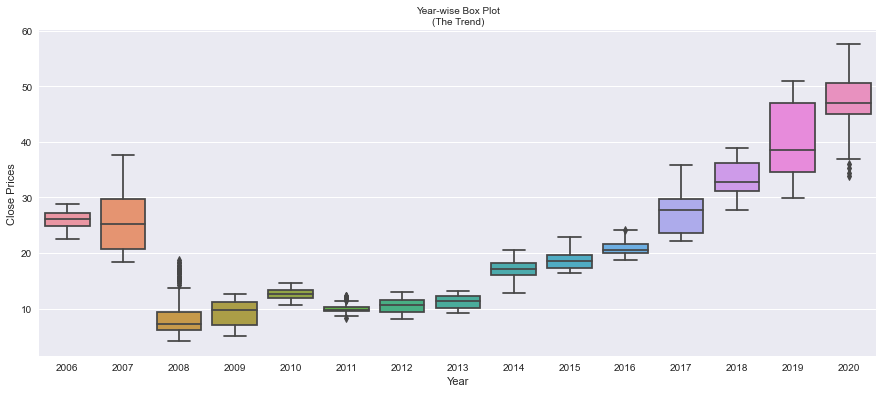

In [14]:
fig, ax = plt.subplots(figsize=(15, 6))

sns.boxplot(df.index.year, df['Close'])
ax.set_title('Year-wise Box Plot\n(The Trend)', fontsize=10, loc='center')
ax.set_xlabel('Year')
ax.set_ylabel('Close Prices')

#### Nhận xét:
   Biểu đồ thời gian cho thấy một số thay đổi đột ngột, đặc biệt là sự sụt giảm lớn vào giữa năm 2008 và đầu năm 2020. Những thay đổi này là do môi trường kinh tế toàn cầu hoặc dịch bệnh. Nếu không thì không có gì bất thường, cổ phiếu có xu hướng tăng trưởng liên tục trong 1 thập kỷ trở lại đây

## 2. Seasonal plot

Trước khi đi vào Seasonal plot, giải thích qua 1 số Time Series Patterns:
- Trend: "changing direction" a long-term increase or decrease in the data
- Seasonal: 
    - fluctuate with an unchanging and known frequency
    - occurs when a time series is affected by seasonal factors such as the time of the year or the day of the week.
- Cyclic:
    - data reises and falls that are not of a fixed frequency
    - usually due to economic conditions, often related to the “business cycle" and have duration of at least 2 years

### 2.1 Công cụ Plot
Bằng trực quan hóa dữ liệu, tìm hiểu xem giá đóng cửa có bị ảnh hưởng bởi yếu tố mùa vụ (seasonal): tháng trong năm, ngày trong tháng, thứ trong tuần hay ko

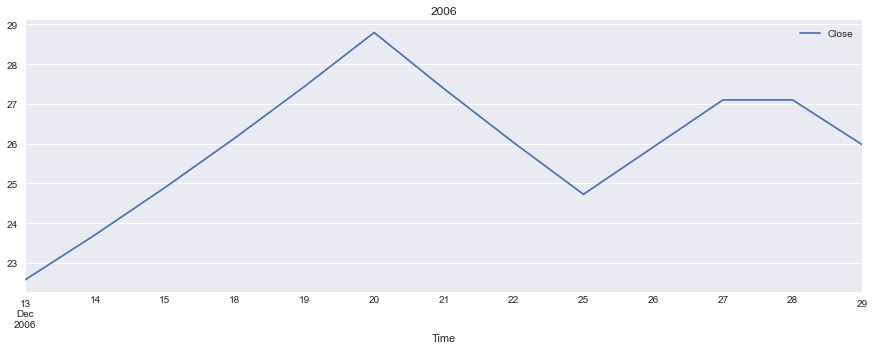

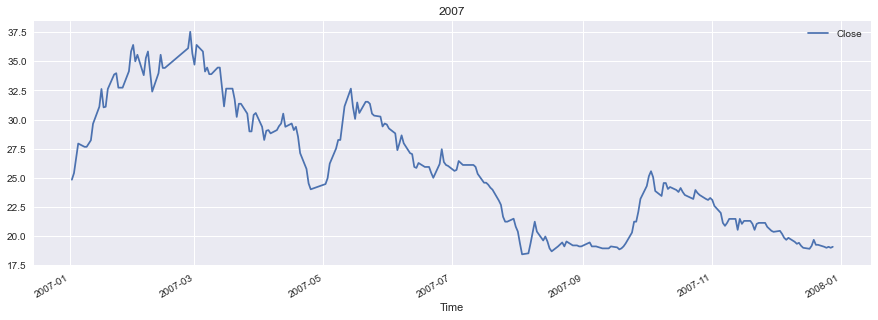

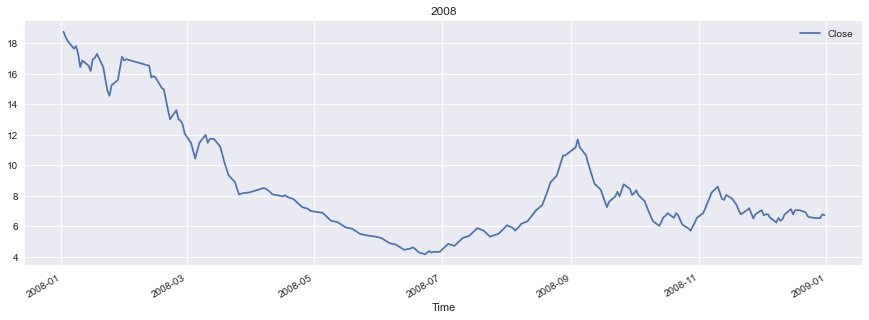

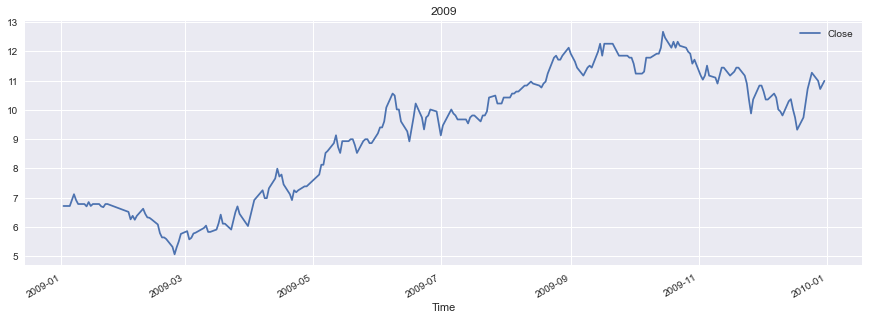

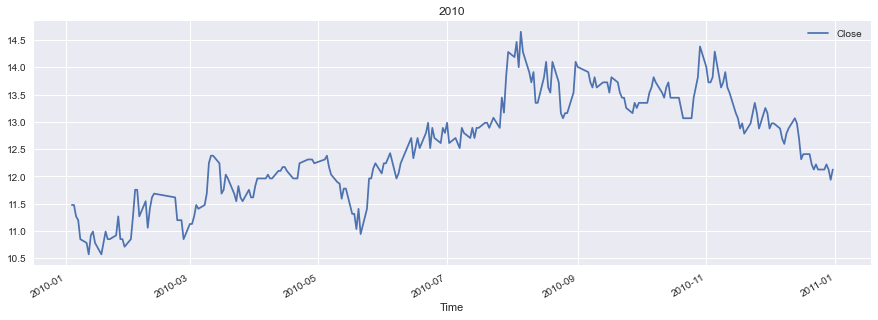

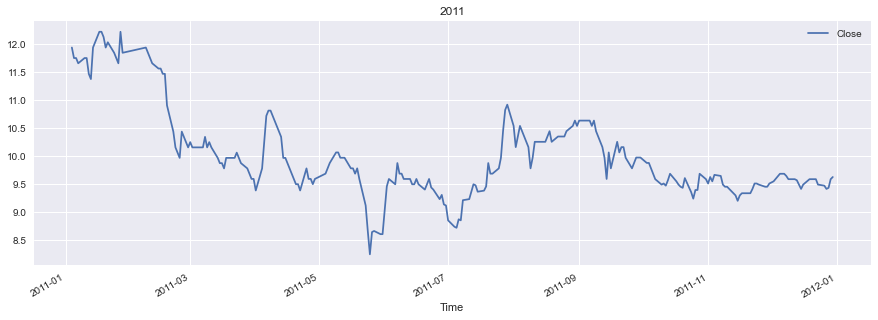

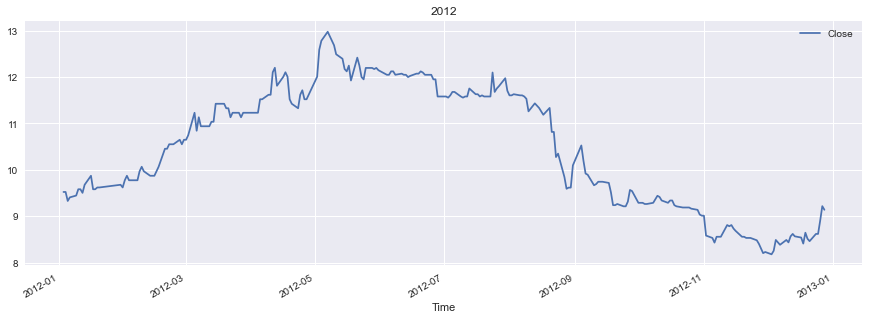

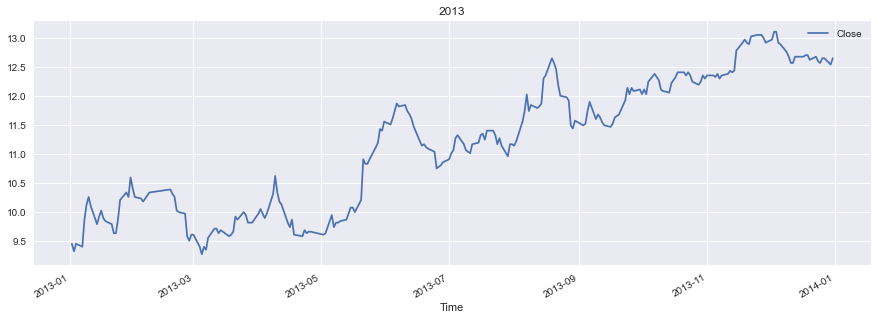

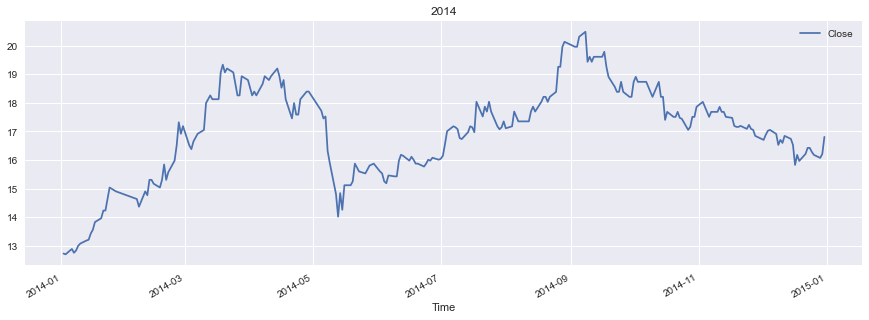

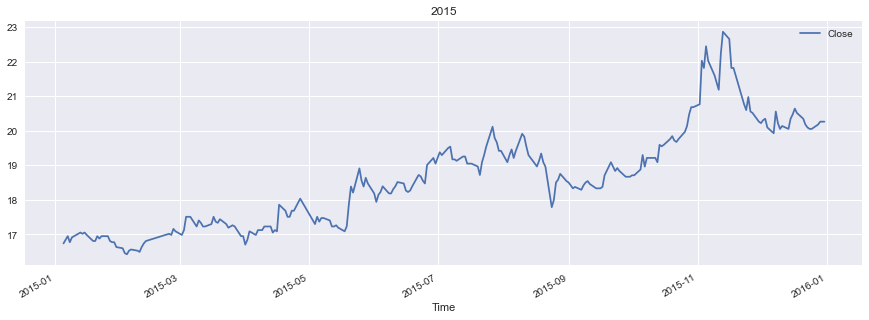

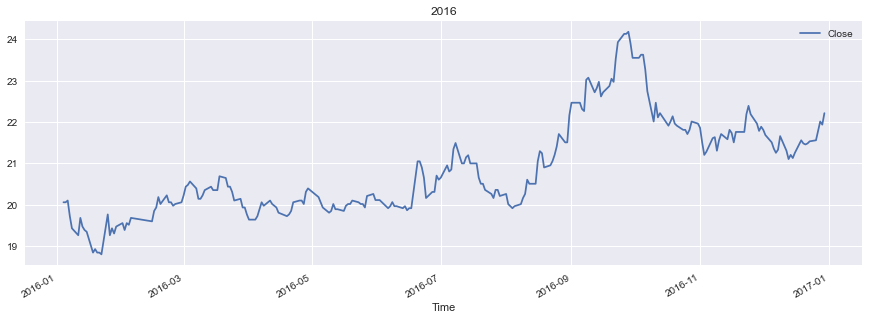

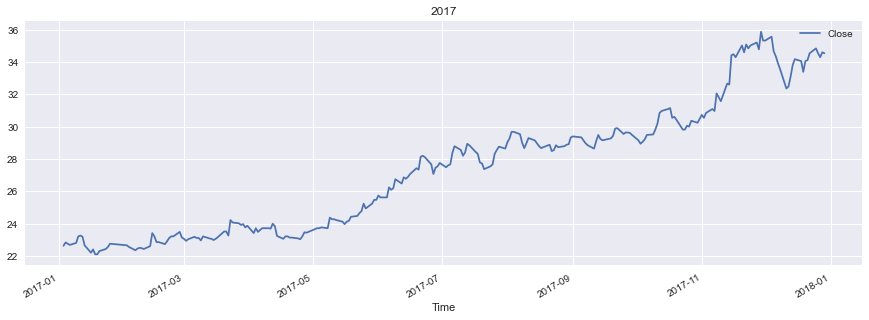

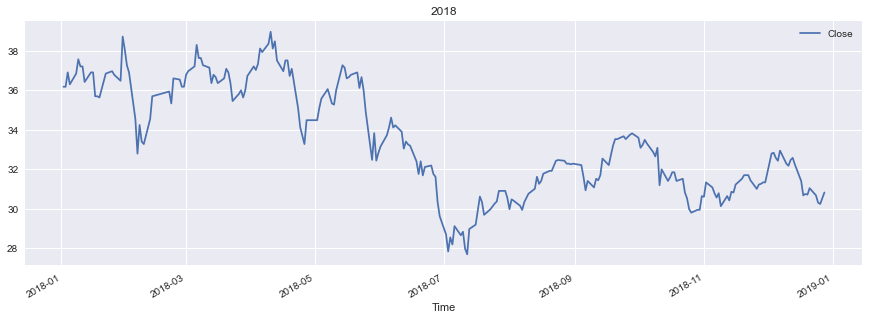

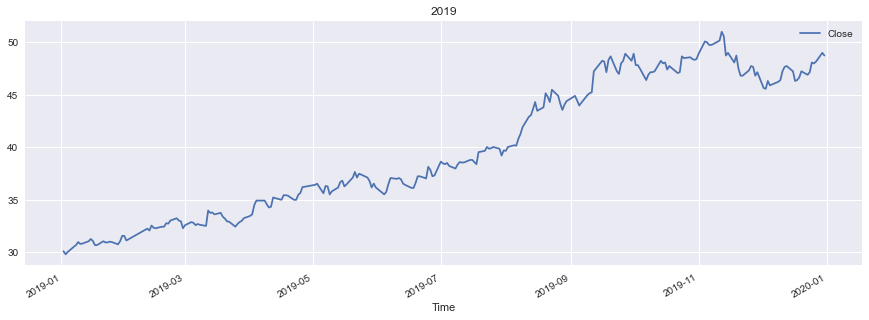

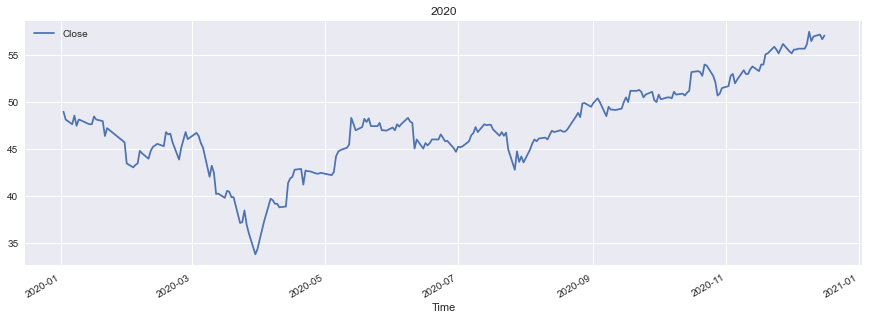

In [15]:
from pandas import Grouper
df_date = df["Close"]
groups = df_date.groupby(Grouper(freq='Y'))
groups
years = pd.DataFrame()
for name, group in groups:
    group.plot(legend=True)
    plt.title(name.year)
    plt.show()

Text(0, 0.5, 'Close Prices')

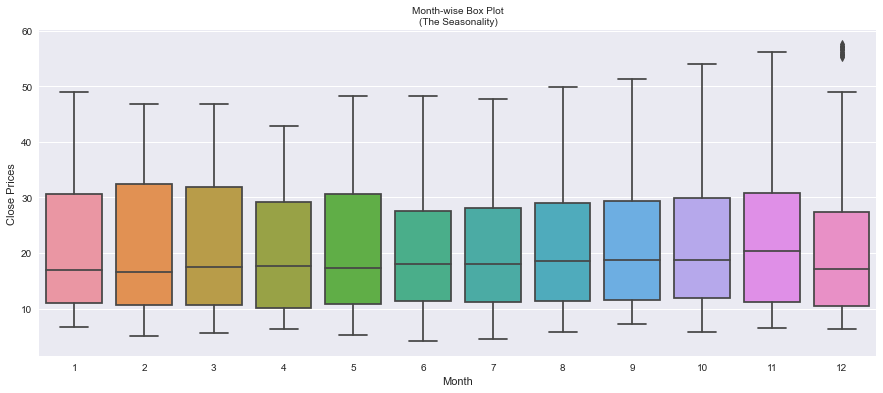

In [16]:
fig, ax = plt.subplots(figsize=(15, 6))

sns.boxplot(df.index.month, df['Close'])
ax.set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=10, loc='center')
ax.set_xlabel('Month')
ax.set_ylabel('Close Prices')

In [17]:
df3 = df.groupby(['year','month'])['Close'].mean().reset_index(name="close_mean")

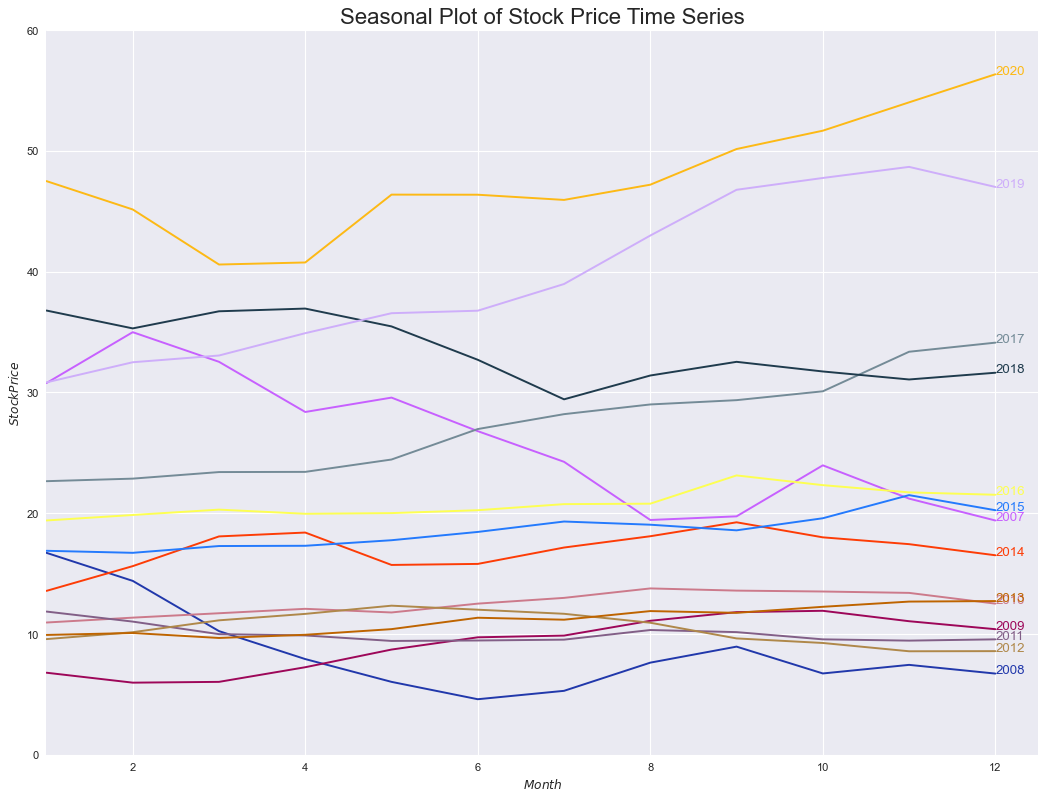

In [19]:
import matplotlib as mpl

np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)
plt.figure(figsize=(16,12), dpi= 80)
years = df['year'].unique()

for i, y in enumerate(years):
    if i > 0:
        plt.plot("month", "close_mean", data=df3.loc[df3.year==y, :], color=mycolors[i])
        plt.text(df3.loc[df3.year==y, :].shape[0], df3.loc[df3.year==y,"close_mean"][-1:].values[0], y, fontsize=12, color=mycolors[i])

# # Decoration
plt.gca().set(xlim=(1,12.5), ylim=(0, 60), ylabel='$Stock Price$', xlabel='$Month$')
plt.yticks()
plt.title("Seasonal Plot of Stock Price Time Series", fontsize=20)
plt.show()

#### Conclusion: 
- Trend: --> Yes
- Seasonal: --> No
- Cyclic: 

### 2.1 Công cụ Decomposition (ETS)

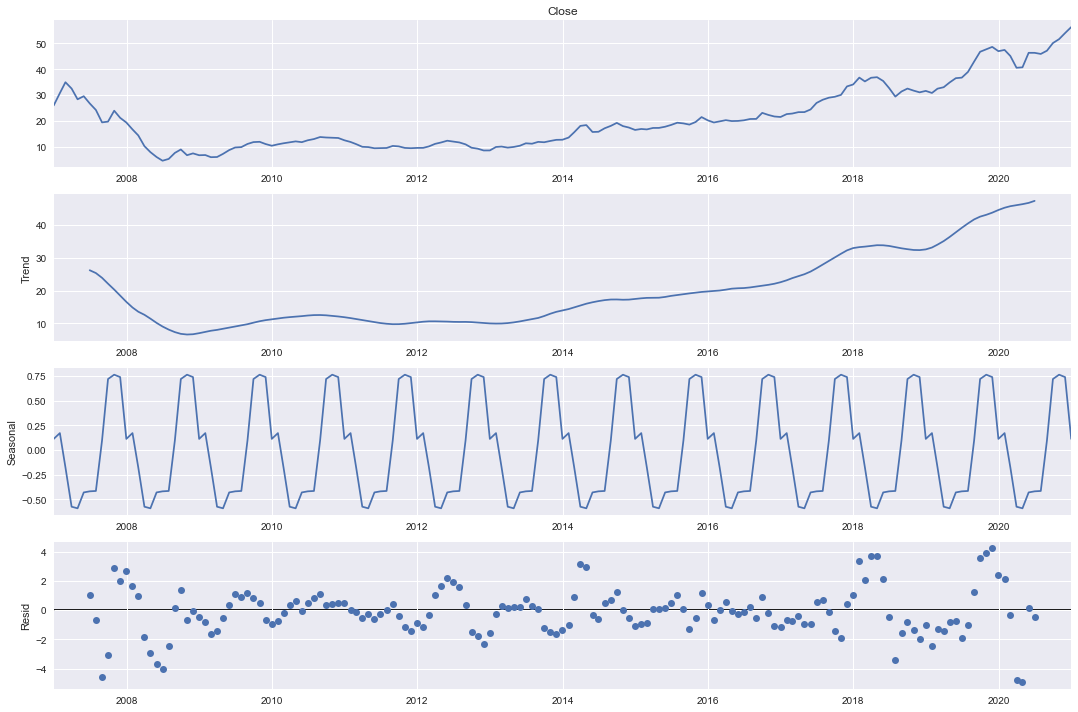

In [20]:
import statsmodels.tsa.seasonal
df_monthly = df["Close"].groupby(pd.Grouper(freq="M")).mean()
plt.rcParams["figure.figsize"] = (15, 10)

decomposition = statsmodels.tsa.seasonal.seasonal_decompose(df_monthly)
decomposition.plot()
plt.show()

Nhận xét: Dữ liệu có tính Seasonal thấp, max đóng góp 750 đồng vào giá cổ phiếu. Giá cổ phiếu FPT chịu tác động lớn nhất của thành phần Trend, sau đó là Residuals 

# 3. Autocorrelation
Giải thích: Autocorrelation là tự tương quan đo lường mối quan hệ tuyến tính giữa các giá trị trễ của một chuỗi thời gian.

In [21]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

Note: Confidence intervals are drawn as a cone. By default, this is set to a 95% confidence interval, suggesting that correlation values outside of this cone are very likely a correlation and not a statistical fluke.

#### 4.1 Autocorrelation (yearly)

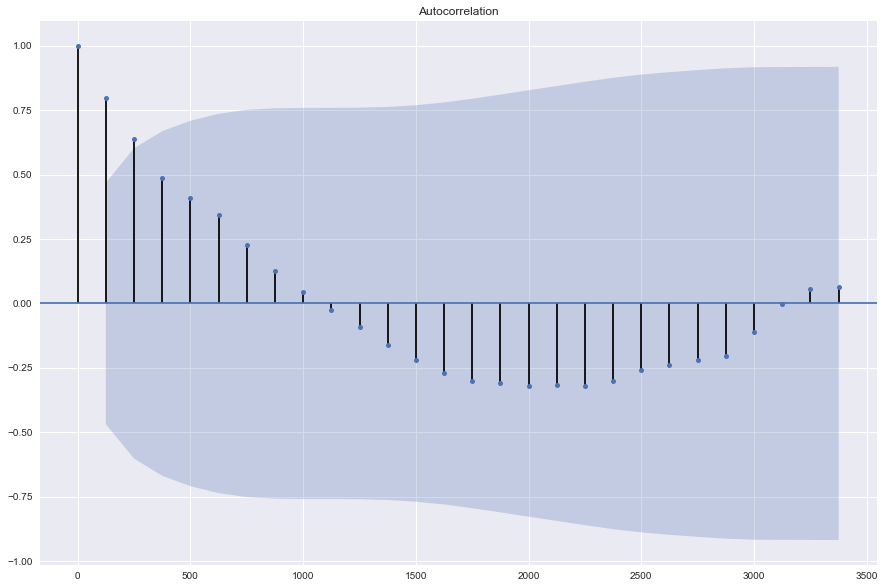

In [23]:
lag_year = np.arange(0,250*14,125)
plot_acf(df["Close"], lags=lag_year)
plt.show()

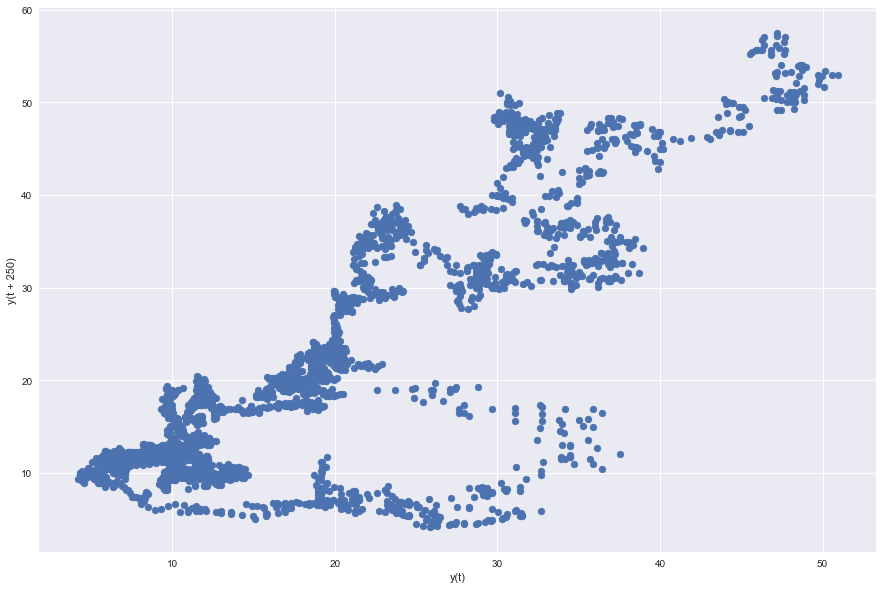

In [24]:
pd.plotting.lag_plot(df["Close"], lag=250)

#### 4.2 Autocorrelation (monthly and daily)

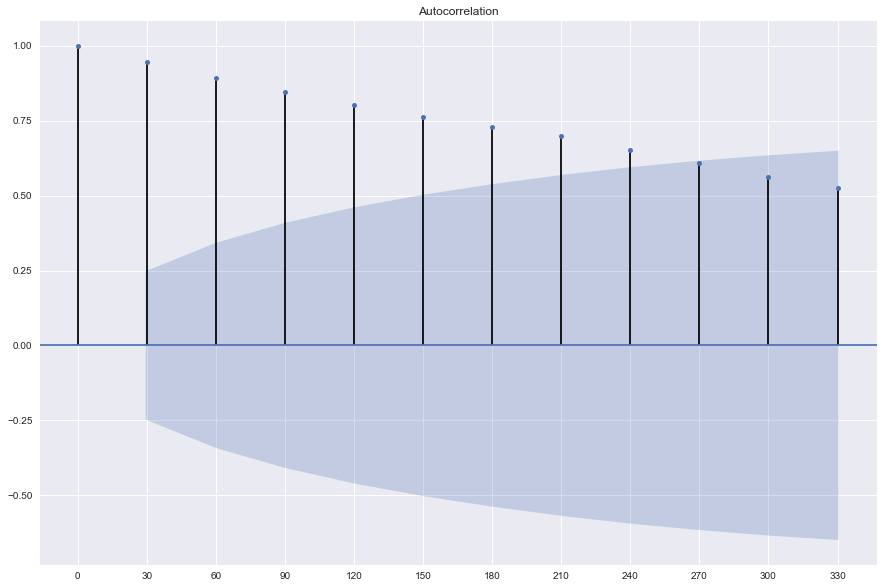

In [25]:
lag_month = np.arange(0,30*12,30)
ax = plt.axes(xticks=lag_month)
# ax.xticks(lag_month)
plot_acf(df["Close"],ax, lags=lag_month)
plt.show()

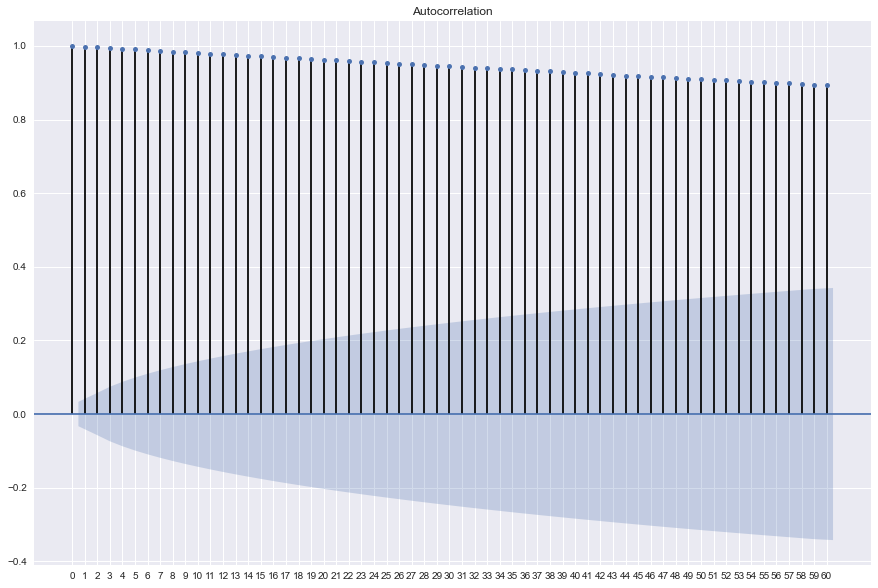

In [29]:
lag_day = np.arange(0,61,1)
ax = plt.axes(xticks=lag_day)
# ax.xticks(lag_month)
plot_acf(df["Close"],ax, lags=lag_day)
plt.show()

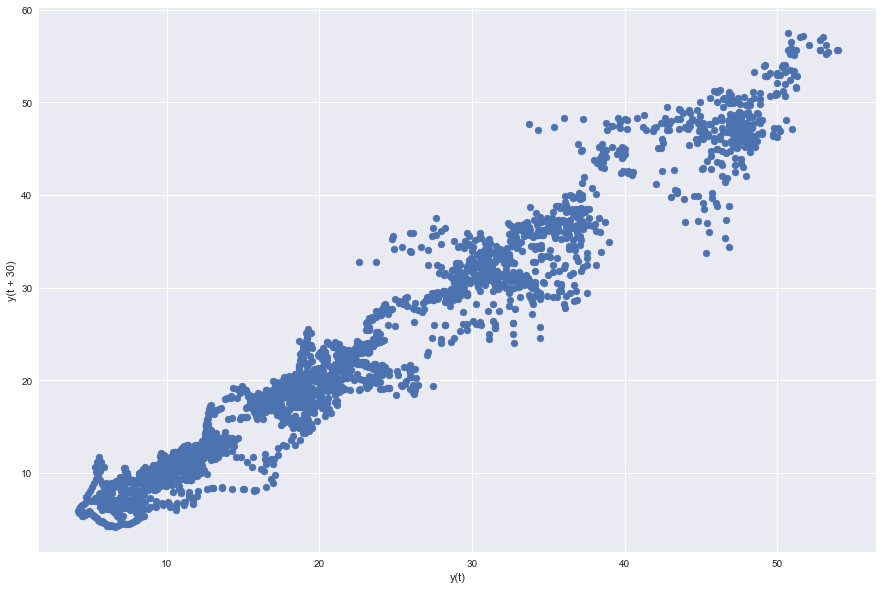

In [27]:
pd.plotting.lag_plot(df["Close"], lag=30)

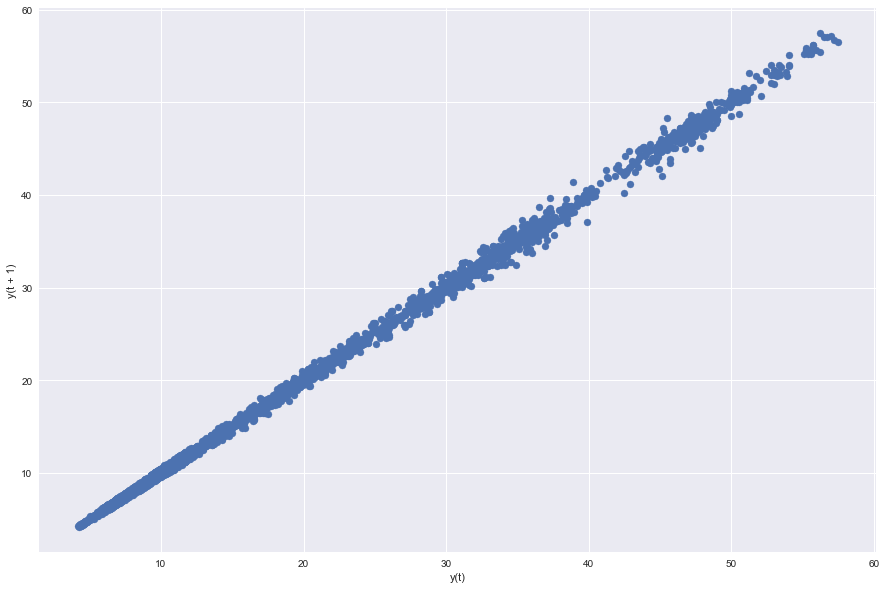

In [28]:
pd.plotting.lag_plot(df["Close"], lag=1)

Nhận xét: 

Giá cổ phiếu hôm nay tương quan rất mạnh đến tận 60,90 ngày trước đó. Tuy nhiên ko thể kết luận giá cổ phiếu của 2-3 tháng trước mang lại nhiều thông tin đáng kể trong việc dự đoán giá cổ phiếu ngày mai. Lý do là vì ACF đo lường sự tương quan giữa giá và giá của k ngày trước đó nhưng chưa loại trừ được ảnh hưởng của (k-1) ngày ở giữa. Để giải quyết vấn đề này, mình sẽ sử dụng Partial Autocorrelations. Chỉ số này đo lượng mối quan hệ giữa Yt và Y(t-k) sau khi đã loại bỏ sự ảnh hưởng của các lag 1,2,…, k-1.

Giải thích:

ACF đo lường tính tự tương quan, tức là mối quan hệ giữa yt và y(t-k) với k là các giá trị lag khác nhau. Bây giờ, nếu Yt và Y(t-1) tương quan, thì Y(t-1) và Y(t-2) cũng phải tương quan. 
Nếu Yt và Y(t-2) tương quan, điều đó có thể chỉ đơn giản là do chúng cùng có sự liên kết nào đó với Y(t-1) hơn là bởi vì Y(t-2) chứa thông tin gì đó mới trong việc dự đoán Yt. 

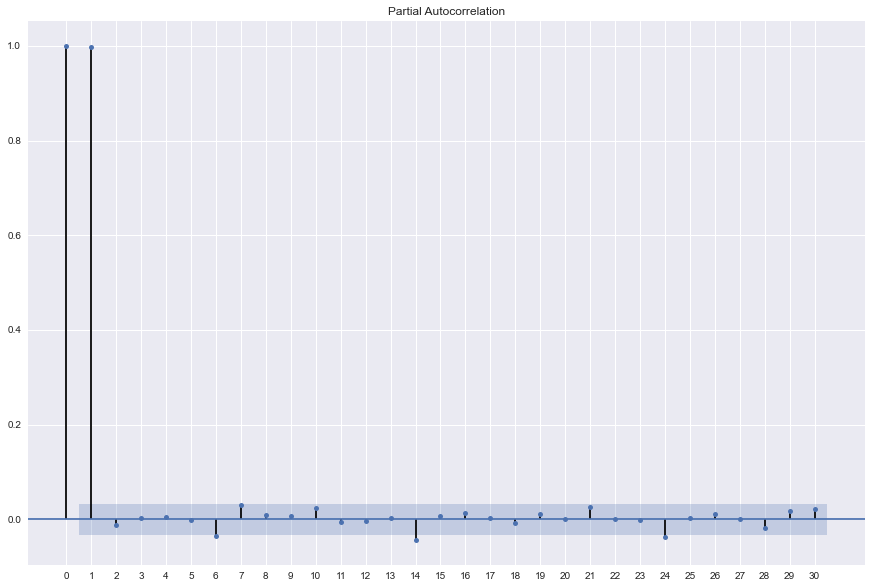

In [30]:
lag_day = np.arange(0,31,1)
ax = plt.axes(xticks=lag_day)
# ax.xticks(lag_month)
plot_pacf(df["Close"],ax, lags=lag_day)
plt.show()

# 4. Stationary:

1. Định nghĩa: Chuỗi thời gian DỪNG là một chuỗi có các đặc tính không phụ thuộc vào thời gian mà chuỗi thời gian được quan sát. Hay nói cách khác là 1 chuỗi không có TREND và SEASONAL. 

2. Tầm quan trọng: Trong phân tích dữ liệu chuỗi thời gian, một mô hình tốt được đưa ra khi phân tích trên các dữ liệu dừng. Theo Ramanathan (2002) hầu hết các chuỗi thời gian về kinh tế là không dừng vì chúng thường có một xu hướng tuyến tính hoặc mũ theo thời gian. Tuy nhiên có thể biến đổi chúng về chuỗi dừng thông qua quá trình sai phân. Nếu sai phân bậc 1 của một chuỗi có tính dừng thì chuỗi ban đầu gọi là tích hợp bậc 1, ký hiệu là I(1). Tương tự, nếu sai phân bậc d của một chuỗi có tính dừng thì chuỗi ban đầu gọi là tích hợp bậc d, ký hiệu là I(d). Nếu chuỗi ban đầu (chưa lấy sai phân) có tính dừng thì gọi là I(0).

3. Cách xác định: Dùng kiểm định thống kê để xác định xem giả thuyết về tính DỪNG có thỏa mãn không 

In [ ]:
#Look at Plots: showing an obvious lack and presence of trend and seasonality components
#When looking at the mean and variance, we are assuming that the data conforms to a Gaussian (also called the bell curve or normal) distribution. But the below graphs show that indeed the distribution of values does not look like a Gaussian, therefore the mean and variance values are less meaningful. 
##Review distribution of data annually
# year_list = df["year"].unique()
# for i in year_list:
#     df_new = df.loc[df["year"]==i]
#     iplot([Histogram(x=df_new['Close'])])
# iplot([Histogram(x=df['Close'])])
# X = df["Close"]
# split = round(len(X) / 2)
# X1, X2 = X[0:split], X[split:]
# mean1, mean2 = X1.mean(), X2.mean()
# var1, var2 = X1.var(), X2.var()
# print('mean1=%f, mean2=%f' % (mean1, mean2))
# print('variance1=%f, variance2=%f' % (var1, var2))

Kiểm định 1: Augmented Dickey-Fuller (ADF) test:
    - Null Hypothesis (H0):  non-stationary
    - Alternate Hypothesis (H1): data is stationary. It does not have time-dependent structure.
Kiểm định 2: KPSS. KPSS có cặp giả thuyết - đối thuyết ngược lại với ADF test

In [31]:
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
X = df["Close"]
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.763469
p-value: 0.991023
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [32]:
from statsmodels.tsa.stattools import kpss

result = kpss(df["Close"], regression='ct')
print("\nKPSS Statistic: {}".format(result[0]))
print("P-Value: {}".format(result[1]))
for key, value in result[3].items():
    print('Critial Values:')
    print("   {}, {}".format(key,value))


KPSS Statistic: 1.982346180805793
P-Value: 0.01
Critial Values:
   10%, 0.119
Critial Values:
   5%, 0.146
Critial Values:
   2.5%, 0.176
Critial Values:
   1%, 0.216


Kết luận về kiểm định ADF: do p-value >> 0.05 nên không thể bác bỏ H0, dữ liệu không có tính dừng
    
Kết luận về kiểm định KPSS: do p-valuue < 0.05 nên bác bỏ H0, chấp nhận H1, dữ liệu không có tính dừng
    
==> Vậy cả 2 kiểm định đều cho ra kết quả giá đóng cửa cổ phiếu FPT không có tính dừng, nên ta cần biến đổi dữ liệu về dạng có tính dừng để dùng cho các model yêu cầu đầu vào là data stationary

# B. Lựa chọn tham số cho mô hình ARIMA(p,d,q)

## 1. Chọn bậc sai phân d

In [38]:
#Cách 1: Dùng logarit 
df["Close_log"] = np.log1p(df['Close'])
#Cách 2: Dùng sai phân bậc 1 (d=1 trong ARIMA)
df['Close_diff'] = df['Close'].diff()
#Cách 3: Dùng sai phân bậc 2 (d=2 trong ARIMA)
df['Close_diff_diff'] = df['Close'].diff().diff()

# df['Close_diff_log'] = np.log1p(df['Close'])-np.log1p(df.shift()['Close'])

Sau khi biến đổi dữ liệu bằng 3 cách trên, tiến hành kiểm định tính dừng với dữ liệu sau khi biến đổi

In [36]:
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
X = df["Close_log"]
X = X.dropna()
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.787296
p-value: 0.822825
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [35]:
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
X = df["Close_diff"]
X = X.dropna()
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -12.054887
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [37]:
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
X = df["Close_diff_diff"]
X = X.dropna()
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -19.628299
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


#### Kết luận: 
Logarit data không có tính dừng. Data sau khi sai phân bậc 1 hoặc bậc 2 có tính dừng ! 

Dùng d = 1 hoặc d = 2 cho ARIMA

## 2. Chọn p và q 

Chọn giá trị p: Từ biểu đồ tương quan riêng phần (Partial Autocorrelation) của các sai phân, ta có thể chọn giá trị bậc p của quá trình tự hồi quy AR

Chọn giá trị q: Từ biểu đồ tự tương quan (Autocorrelation) của các sai phân, ta có thể chọn giá trị bậc q của quá trình MA

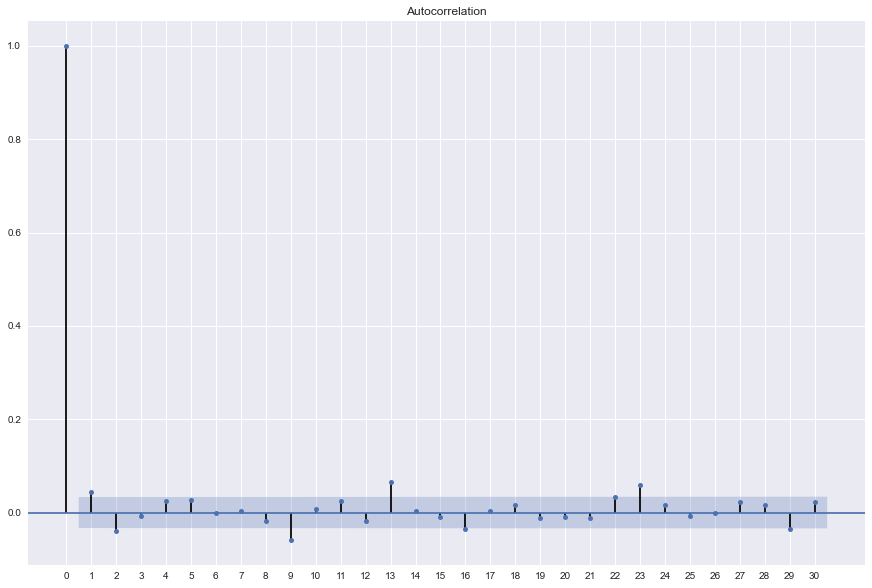

In [41]:
lag_day = np.arange(0,31,1)
ax = plt.axes(xticks=lag_day)
# ax.xticks(lag_month)
plot_acf(df["Close_diff"].dropna(),ax, lags=lag_day)
plt.show()

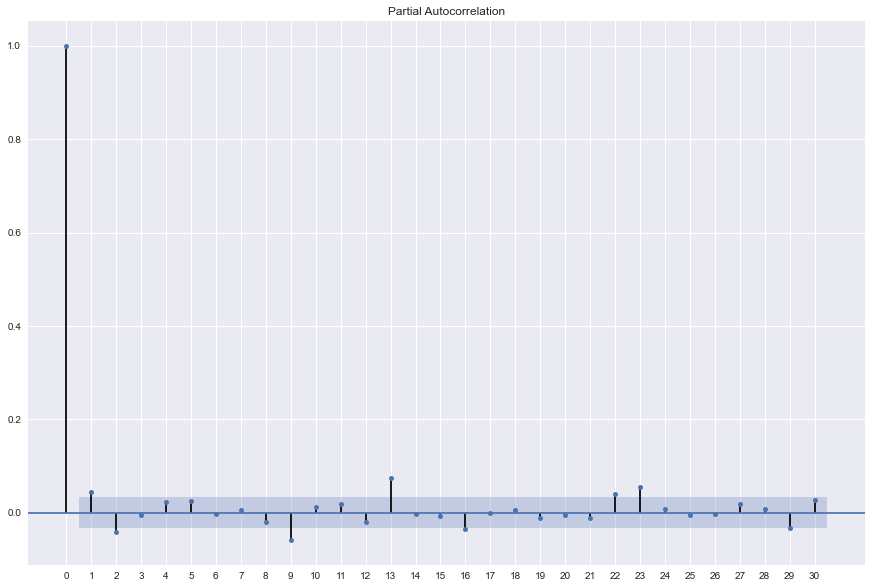

In [44]:
lag_day = np.arange(0,31,1)
ax = plt.axes(xticks=lag_day)
plot_pacf(df['Close_diff'].dropna(),ax, lags=lag_day)
plt.show()

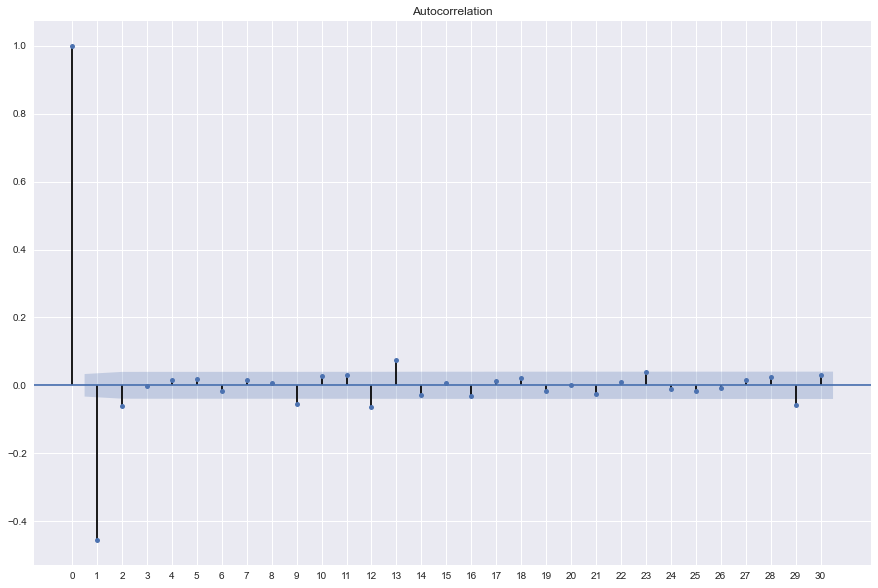

In [45]:
lag_day = np.arange(0,31,1)
ax = plt.axes(xticks=lag_day)
# ax.xticks(lag_month)
plot_acf(df["Close_diff_diff"].dropna(),ax, lags=lag_day)
plt.show()

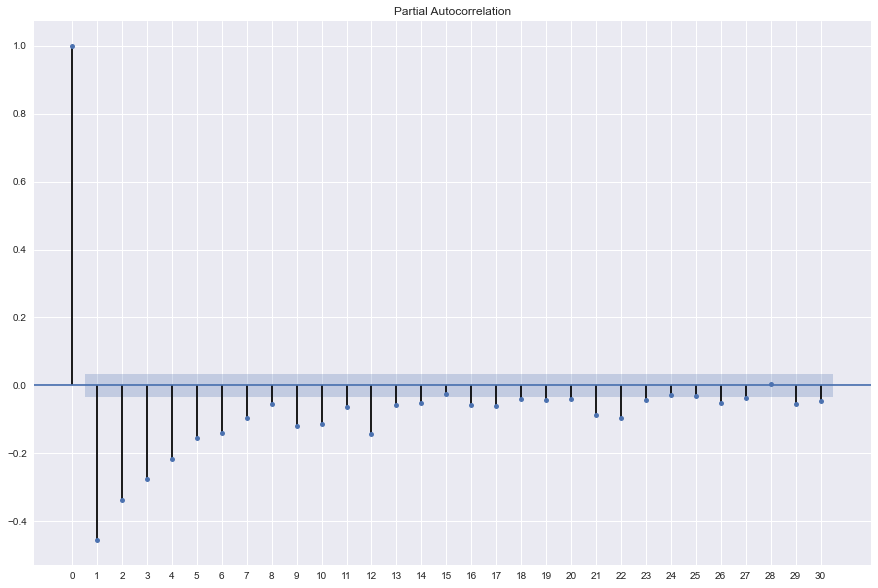

In [46]:
lag_day = np.arange(0,31,1)
ax = plt.axes(xticks=lag_day)
# ax.xticks(lag_month)
plot_pacf(df["Close_diff_diff"].dropna(),ax, lags=lag_day)
plt.show()

#### Kết luận: (p, d, q) = (1, 1, 1), (1, 1, 0), (1, 2, 1), (1, 2, 0)

## C. EDA các biến còn lại

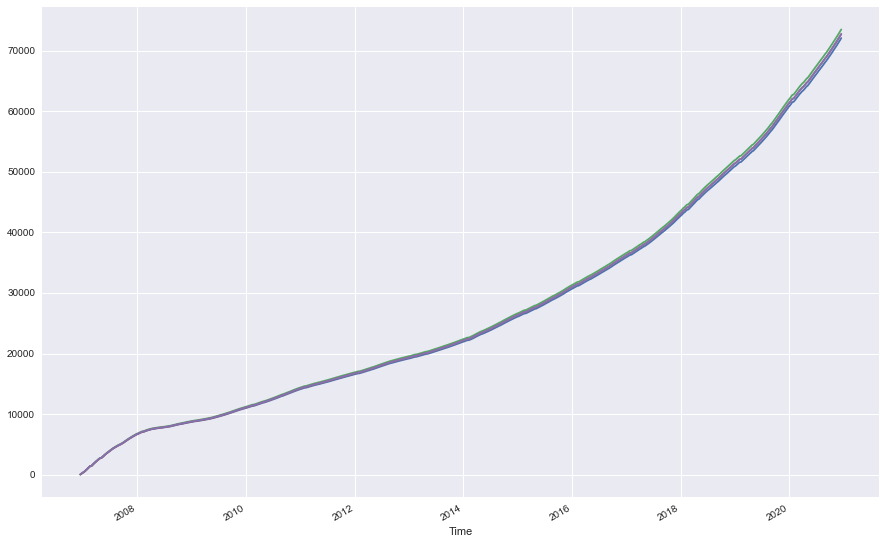

In [47]:
# Let's look at the plots of the data and correlation values (measures the strength of the linear relationship between 2 variables)
np.cumsum(df["Low"]).plot()

np.cumsum(df["High"]).plot()

np.cumsum(df["Open"]).plot()

np.cumsum(df["Close"]).plot()

# np.cumsum(df["Volume"]).plot()


Đồ thị biểu diễn Giá trị cộng dồn của các biến High, Low, Open, Close gần như trùng khớp và là giá trị dương ==> cho thấy trong từng ngày, 4 thuộc tính này có giá trị gần như bằng nhau

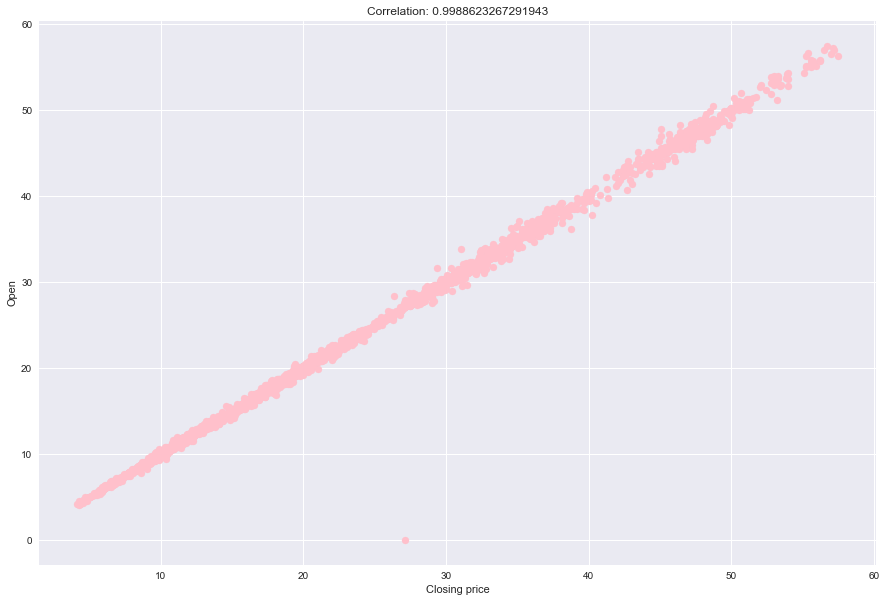

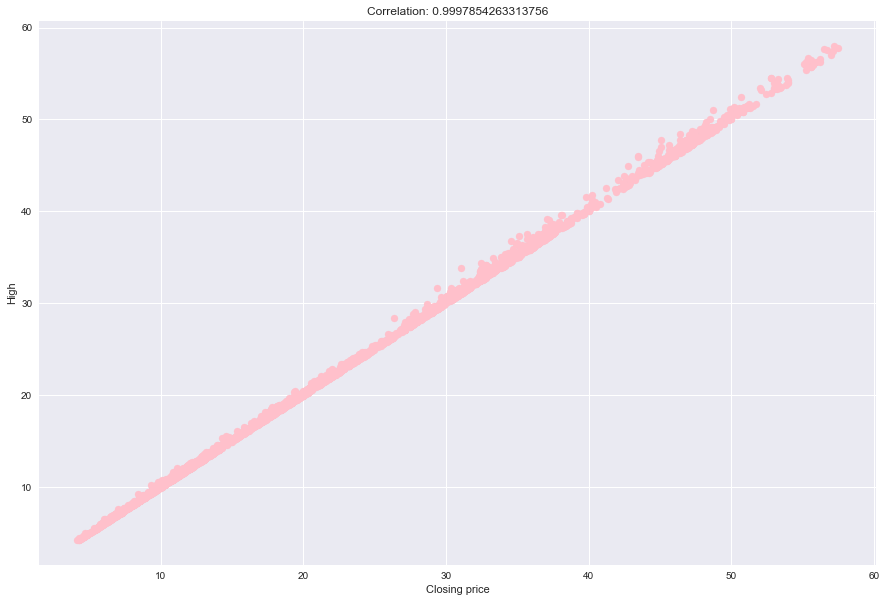

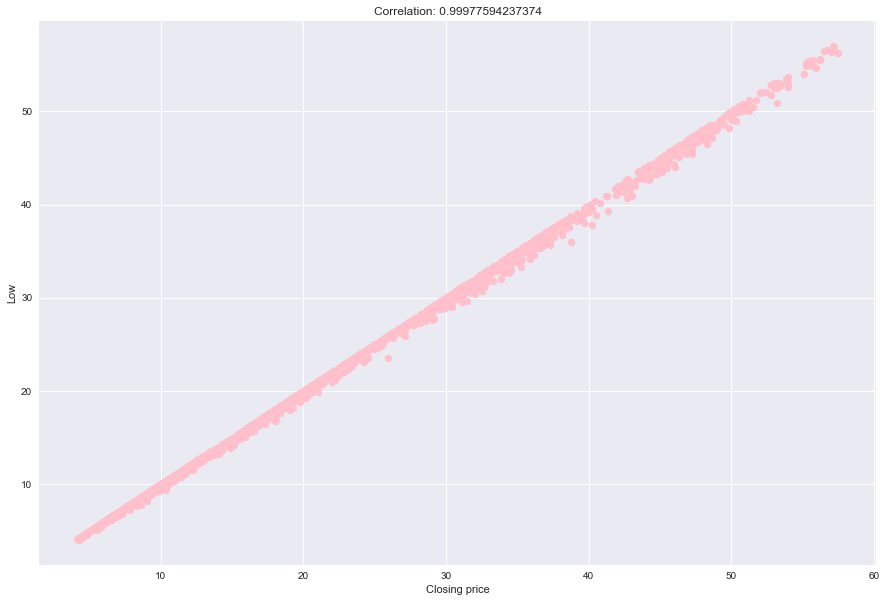

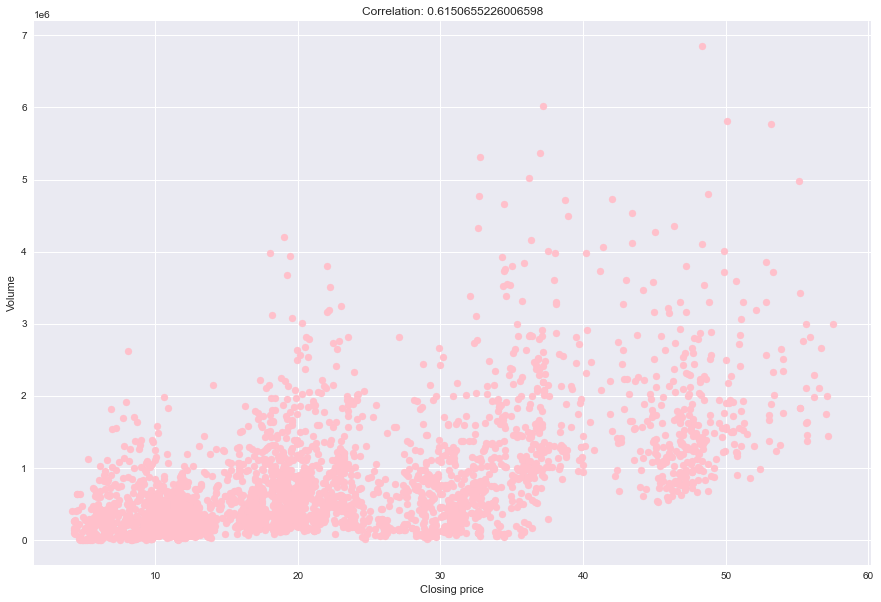

In [48]:
l = ["Open", "High","Low", "Volume"]
for i in l:
    plt.scatter(df["Close"], df[i], c = "pink")
    plt.xlabel("Closing price")
    plt.ylabel(i)
    j = np.corrcoef(df["Close"].values, df[i].values)[0][1]
    plt.title("Correlation: "+ str(j))
    plt.show()

Tương quan của High, Open, Low với giá Close rất lớn, nên bỏ các biến này khỏi mô hình để tránh tình trạng Đa cộng tuyến

In [ ]:
Biến Volume và biến Close có hệ số tương quan là 0.6, nếu bỏ thêm biến này vào mô hình có thể tiến hành kiểm định thống kê về mức độ tương quan, tuy nhiên vì dự án chỉ sử dụng mô hình đa biến nên phần này 